In [29]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

# Matplotlib Settings
matplotlib.rc('figure', facecolor='k')
style.use('dark_background')

### 1. Importing, Displaying and Saving an Image

In [2]:
# Improting image
img = cv2.imread('Images/azadi_square.jpg', cv2.IMREAD_GRAYSCALE)
#IMREAD_GRAYSCALE   0
#IMREAD_COLOR       1
#IMREAD_UNCHANGED  -1

In [3]:
# Displaying with cv2
cv2.imshow('image', img)
cv2.waitKey(0) # closes on any keypress
cv2.destroyAllWindows()

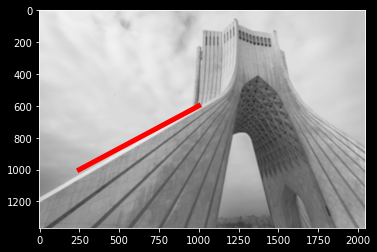

In [4]:
# Displaying with plt
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.plot([250,1000], [1000,600], 'r', linewidth=5)
plt.show()

# cv2 BGR
# plt RGB

In [5]:
# Saving
cv2.imwrite('Images/azadigray.jpg', img)

True

### 2. Streaming, Editting and Saving Video

In [6]:
import urllib

fourcc = cv2.cv.CV_FOURCC(*'XVID')
out = cv2.VideoWriter('Capture/first_video.avi', fourcc, 20.0, (352, 288))

while True:
    
    # Getting the stream
    url = urllib.urlopen('http://192.168.1.118:8080/shot.jpg')
    stream = np.array(bytearray(url.read()), dtype=np.uint8)
    
    cap1 = cv2.imdecode(stream, -1) # Original feed
    cap2 = cv2.imdecode(stream, 0) # Editted feed
    
    cv2.imshow('unchanged', cap1)
    cv2.imshow('grayscale', cap2)
    
    # Saving video
    out.write(cap1)
    
    # Quitting on q
    if ord('q') == cv2.waitKey(10):
        break

out.release()
cv2.destroyAllWindows()

### 3. Drawing and Writing on Images

In [25]:
img = cv2.imread('Images/azadi_square.jpg', cv2.IMREAD_COLOR)

# Draw Line   Start  End          BGR        Width
cv2.line(img, (0,0), (1000,1000), (0,0,255), 5)
cv2.rectangle(img, (500,500), (1000,1000), (0,255,0), 5)
cv2.circle(img, (750,750), 50, (255), -1)
pts = np.array([[300,300], [400,100], [500,500]], np.int32)
cv2.polylines(img, [pts], True, (0,255,255), 5)

# Writing Text
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'Hello World!', (500,500), font, 5, (0,0,0), 5)

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 4. Pixel Referencing

In [11]:
img = cv2.imread('Images/azadi_square.jpg', cv2.IMREAD_COLOR)

# Changing the colour of a single pixel
img[1000,1000] = [0,0,255]

# Getting the colour of a signle pixel
print img[1000,1000]

# Getting a region of an image
region = img[1000:1010, 1000:1010]
print region

# Shading a region of an image
img[500:600, 1000:1300] = [255,255,255]

# Copying and pasting regions of an image
some_region = img[700:800, 1000:1300]
img[0:100, 0:300] = some_region

# Highlighting copied region
cv2.rectangle(img, (1000,700), (1300,800), (0,255,255), 3)

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[  0   0 255]
[[[  0   0 255]
  [ 79 103 145]
  [ 77 101 143]
  [ 84 108 150]
  [ 88 112 154]
  [ 86 110 152]
  [ 87 111 153]
  [ 92 116 158]
  [ 90 112 154]
  [ 83 105 147]]

 [[ 83 107 149]
  [ 82 106 148]
  [ 80 104 146]
  [ 81 105 147]
  [ 87 111 153]
  [ 91 115 157]
  [ 89 113 155]
  [ 84 108 150]
  [ 78 100 142]
  [ 72  94 136]]

 [[ 80 104 146]
  [ 83 107 149]
  [ 85 109 151]
  [ 84 108 150]
  [ 85 109 151]
  [ 87 111 153]
  [ 86 110 152]
  [ 83 107 149]
  [ 71  95 137]
  [ 76 100 142]]

 [[ 86 108 150]
  [ 80 102 144]
  [ 80 102 144]
  [ 87 111 153]
  [ 92 116 158]
  [ 87 111 153]
  [ 81 105 147]
  [ 78 102 144]
  [ 80 105 147]
  [ 89 114 156]]

 [[ 79 101 143]
  [ 81 103 145]
  [ 86 108 150]
  [ 90 112 154]
  [ 85 109 151]
  [ 79 103 145]
  [ 79 103 145]
  [ 84 108 150]
  [ 90 115 157]
  [ 89 114 156]]

 [[ 79 101 143]
  [ 87 109 151]
  [ 88 110 152]
  [ 79 101 143]
  [ 74  96 138]
  [ 79 103 145]
  [ 88 112 154]
  [ 92 116 158]
  [ 85 113 154]
  [ 86 114 155]]

 [[ 91 110 153

### 5. Image Arithmatics and Logic

In [62]:
k1 = cv2.imread('Images/k1.jpg')
k2 = cv2.imread('Images/k2.jpg')
klogo = cv2.imread('Images/klogo.jpg')

# add = k1+k2+k3
# add = cv2.add(k1, k2)
# weighetd = cv2.addWeighted(k1, 0.5, k3, 0.5, 0)

rows, cols, channels = klogo.shape
roi = k1[0:rows, 0:cols]
cv2.imshow('roi', roi)

# Getting parts of the logo that we want to keep
klogo_gray = cv2.cvtColor(klogo, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(klogo_gray, 220, 255, #covert colours above 220 to 255
                          cv2.THRESH_BINARY_INV) #inverts the colours

# Invisible parts
mask_inv = cv2.bitwise_not(mask) 

# Creating layers and joining them
k1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
klogo_fg = cv2.bitwise_and(klogo, klogo, mask=mask)
dst = cv2.add(k1_bg, klogo_fg)
k1[0:rows, 0:cols] = dst

# Displaying steps
cv2.imshow('k1_bg', k1_bg)
cv2.imshow('klogo_fg', klogo_fg)
cv2.imshow('dst', dst)
cv2.imshow('final', k1)

cv2.waitKey(0)
cv2.destroyAllWindows()